# Data Collection, Preparation and Portfolio Optimisation

The objective of this notebook is to _demonstrate_ the use of Python for
collection a dataset from an open web API, with further preprocessing and analysis of the collected data. As an excersise, the data is written into a `*.csv` file, and than is read back.

This notebook consists of two parts. In the **Part 1**, we collect the exchange rates published by European Central Bank, manipulate with the data and describe it via appropriate visualisation.

In the **Part 2**, we discuss the portfolio optimisation based on the data collected in the first part. For this purpose the problem of minimisation the volatolity of a portfolio for a fixed return is considered and solved exactly. The solution is presented than as Python function. Tne procedure is generalised.

# Part 1: Data Collection, Manipulation & Illustration

For the sake of illustration, we start with gathering the data for only one month. Later in the script, the process is automated and enough of data is gathered (7 years).

## 1.1. Data Collection and Manipulation

Exchange rates published by European Central Bank are provided by __[this API](https://exchangeratesapi.io/)__. Let's scribe 4 currencies, EUR, CHF, RUB, and GBP (expressed in USD) for one month:

In [1]:
import urllib.request

url = "https://api.exchangeratesapi.io/"
period = "history?start_at=2019-01-01&end_at=2019-02-01"
base = "&base=USD"
currencis = "&symbols=EUR,CHF,RUB,GBP"

response = urllib.request.urlopen(url+period+base+currencis)
raw_json = response.read().decode("utf-8")

# Parse the JSON and convert it from a string into a Python dictionary
import json
data = json.loads(raw_json)
print(data)

{'rates': {'2019-01-09': {'CHF': 0.9803579223, 'EUR': 0.8729812309, 'RUB': 67.1257092973, 'GBP': 0.7849236141}, '2019-01-18': {'CHF': 0.9937730223, 'EUR': 0.8770391159, 'RUB': 66.3275741098, 'GBP': 0.7728907209}, '2019-01-23': {'CHF': 0.9971848333, 'EUR': 0.8797395971, 'RUB': 66.1825459664, 'GBP': 0.7672472948}, '2019-01-30': {'CHF': 0.9977250853, 'EUR': 0.8749671887, 'RUB': 65.9388397935, 'GBP': 0.7642050923}, '2019-01-16': {'CHF': 0.9894635174, 'EUR': 0.8780402142, 'RUB': 66.6586179647, 'GBP': 0.7778558258}, '2019-01-24': {'CHF': 0.9948858125, 'EUR': 0.8817564589, 'RUB': 65.9437439379, 'GBP': 0.7678776122}, '2019-01-10': {'CHF': 0.9775465973, 'EUR': 0.8669267447, 'RUB': 66.9693107932, 'GBP': 0.7839011704}, '2019-01-29': {'CHF': 0.9938714761, 'EUR': 0.8755034145, 'RUB': 66.2657152863, 'GBP': 0.7593678865}, '2019-01-03': {'CHF': 0.9886323581, 'EUR': 0.8812125485, 'RUB': 68.9650158618, 'GBP': 0.7958406768}, '2019-02-01': {'CHF': 0.9934617732, 'EUR': 0.8717635777, 'RUB': 65.4847877256, '

Parse the JSON and convert it from a string into a Python dictionary:

Such a dictionary can be converted into a pandas' `DataFrame`, however it has a lot of additional information, which we will not going to use.

In [2]:
import pandas as pd

df = pd.DataFrame(data)
df.head()

,rates,start_at,base,end_at
2019-01-02,"{'CHF': 0.9861367026, 'EUR': 0.8774238835, 'RU...",2019-01-01,USD,2019-02-01
2019-01-03,"{'CHF': 0.9886323581, 'EUR': 0.8812125485, 'RU...",2019-01-01,USD,2019-02-01
2019-01-04,"{'CHF': 0.9871086556, 'EUR': 0.8769622029, 'RU...",2019-01-01,USD,2019-02-01
2019-01-07,"{'CHF': 0.980952381, 'EUR': 0.873743993, 'RUB'...",2019-01-01,USD,2019-02-01
2019-01-08,"{'CHF': 0.9818181818, 'EUR': 0.8741258741, 'RU...",2019-01-01,USD,2019-02-01


Moreover, the values of currancies are given altogether as a dictionary. We extract these values, create a new dictionary and convert it to a `DataFrame` then.

In [3]:
# create empty lists for dates and currancies' values
dates = []
chf = []
eur = []
rub = []
gbp = []
# parse the data, extract only the information we need and write it into a corresponding list
for day in data['rates']:
    dates.append(day)
    chf.append(data['rates']['%s' % day]['CHF'])
    eur.append(data['rates']['%s' % day]['EUR'])
    rub.append(data['rates']['%s' % day]['RUB'])
    gbp.append(data['rates']['%s' % day]['GBP'])

# create a dictionary
d = {"Date":dates, "EUR":eur, "CHF":chf, "RUB":rub, "GBP":gbp}
print("We got a dictionary with the following structure:\n")
for key in d:
    print("The '%s' category  with %s elements" % (key,len(d[key])))

We got a dictionary with the following structure:

The 'Date' category  with 23 elements
The 'EUR' category  with 23 elements
The 'CHF' category  with 23 elements
The 'RUB' category  with 23 elements
The 'GBP' category  with 23 elements


Note that the data in the created dictionary is not sorted.

In [4]:
# create a DataFrame
df = pd.DataFrame(d)
# set the first column, 'Date', to be the index 
df = df.set_index("Date")
# sort all the data
df = df.sort_index()
df

,EUR,CHF,RUB,GBP
Date,,,,
2019-01-02,0.877424,0.986137,69.631394,0.791129
2019-01-03,0.881213,0.988632,68.965016,0.795841
2019-01-04,0.876962,0.987109,68.121547,0.789161
2019-01-07,0.873744,0.980952,66.899432,0.783923
2019-01-08,0.874126,0.981818,67.062675,0.784467
2019-01-09,0.872981,0.980358,67.125709,0.784924
2019-01-10,0.866927,0.977547,66.969311,0.783901
2019-01-11,0.867077,0.982138,67.083933,0.780499
2019-01-14,0.872068,0.981774,67.201709,0.778434


Write the cleaned data to a *.csv file

In [5]:
df.to_csv("exchange_rates_month.csv")

Let us now read this file and write the data into the same variable _df_. But now, while reading the file, we will indicate that the column 'Dates' does has dates.

In [6]:
df = pd.read_csv("exchange_rates_month.csv", parse_dates = ['Date'], index_col = ['Date'])

`parse_dates` allows one to create a time series plot: 'Date'-column can be used as x-axis now.

Text(0.5, 0, 'Date')

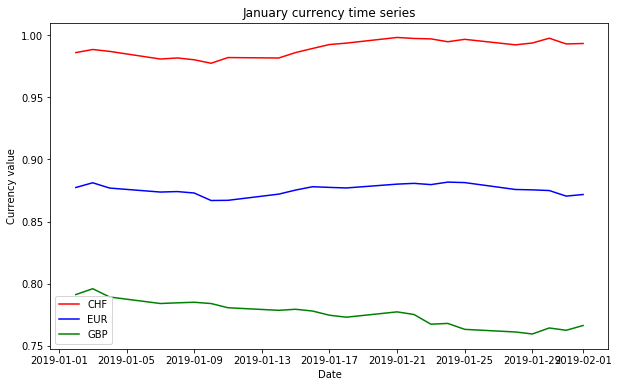

In [7]:
import matplotlib.pyplot as plt
import datetime                         # this package allows python to understand date formatting
%matplotlib inline

fig, ax = plt.subplots(figsize = (10,6))

# add the x-axis and the y-axis to the plot
ax.plot(df.index.values, 
        df['CHF'], 
        color = 'red', label = 'CHF')
ax.plot(df.index.values, 
        df['EUR'], 
        color = 'blue', label = 'EUR')
ax.plot(df.index.values, 
        df['GBP'], 
        color = 'green', label = 'GBP')

plt.legend(loc=0)
plt.title('January currency time series')
plt.ylabel("Currency value")
plt.xlabel('Date')

# this figure is for illustration only, so it is not formatted properly

Surely, such a plot with the data for only one month doesn't give any information. Thus, we will generalise the procedure in order to be able to:
- choose arbitrary number of currencies
- select different dates
- write into a file with a corresponding name

First, we write a small function (method) for counting the (approximate) number of months between two dates.

In [8]:
from datetime import datetime

def months (start_date, end_date):
    date_format = "%Y-%m-%d"
    a = datetime.strptime(start_date, date_format)
    b = datetime.strptime(end_date, date_format)
    delta = b - a
    m = round( (delta.days)/30 )
    
    return m

The function counts a new month when a half of a current one has passed. Comprate these two outputs:

In [9]:
# 5 months and 14 days
months("2018-01-01", "2018-06-14")

5

In [10]:
# 5 months and 15 days
months("2018-01-01", "2018-06-15")

6

Any way, it's not a rocket science --  we need this method only for giving names to the files with data.

The method below is the generalisation of the procedure described above.

In [11]:
from urllib.error import HTTPError # the class needed to catch the error

def get_rates( start_date, end_date, currencies ):
    try:
        # the url
        url = "https://api.exchangeratesapi.io/"
        period = "history?start_at="+start_date+"&end_at="+end_date
        base = "&base=USD"

        # get a string with data
        response = urllib.request.urlopen(url+period+base+"&symbols="+currencies)
        raw_json = response.read().decode("utf-8")
        # create a dictionary
        data = json.loads(raw_json)
        
        # create an empty list to store dates
        dates = []
        # get a list of currencies
        listOfCurrencies = currencies.split(',')
        # create a list of empty lists to store currencies' values
        values = [[] for _ in range(len(listOfCurrencies))] # len(listOfCurrencies) gives the number of currencies

        # write currencies' rates into the list of lists
        for day in data['rates']:
            dates.append(day)
            for i in range(len(listOfCurrencies)):
                values[i].append( (data['rates']['%s' % day][listOfCurrencies[i]]) )
                
        # create a dictionary from
        # (i) the list with names of currencies, and 
        # (ii) the list of lists with rates   
        d = {"Date":dates}
        for i in range(len(listOfCurrencies)):
            d.update( {listOfCurrencies[i] : values[i]}  )
        
        # create a DataFrame from a dictionary
        df = pd.DataFrame(d)
        df = df.set_index("Date")
        df = df.sort_index()

        # save to a file <filename>.csv
        filename = "ex_rates_(%sm_%scur).csv" % (months(start_date, end_date), len(listOfCurrencies))
        # <filename> has the information on how many months and currencies are used
        df.to_csv( filename )
        
        # return pandas DataFrame
        return pd.read_csv(filename, parse_dates = ['Date'], index_col = ['Date'])
    
    # if the input was incorrect, show this
    except HTTPError as e:
        print(e, "\n\nYour input should be:\n 'start_date', 'end_date', 'XXX'\n where both start and end dates are in 'y-m-d' formats, and 'XXX' is a currency code; separate currencies with comma if more than one.")
        return 0

## 1.2. Illustration

Let us collect data for the 7 years for 11 currencies.

In [12]:
df = get_rates("2014-01-01", "2021-02-01", "CHF,EUR,GBP,RUB,CAD,SEK,JPY,BGN,PLN,MXN,HRK") 
# show only last 10 rows
df.tail(10)

,CHF,EUR,GBP,RUB,CAD,SEK,JPY,BGN,PLN,MXN,HRK
Date,,,,,,,,,,,
2021-01-19,0.887652,0.824266,0.734421,73.722387,1.272502,8.321217,103.989449,1.612100,3.738213,19.606825,6.235987
2021-01-20,0.890670,0.826378,0.731865,73.617883,1.270887,8.378068,103.809603,1.616230,3.745310,19.644575,6.250310
2021-01-21,0.886083,0.822504,0.728944,73.726682,1.262132,8.292894,103.405165,1.608653,3.724626,19.612025,6.222241
2021-01-22,0.886083,0.822504,0.732398,74.930827,1.271426,8.292071,103.791742,1.608653,3.732933,19.932966,6.222652
2021-01-25,0.886438,0.822910,0.730744,75.438776,1.272136,8.280530,103.736011,1.609447,3.736751,19.990701,6.226547
2021-01-26,0.888495,0.823520,0.730446,75.149304,1.271844,8.294079,103.705839,1.610640,3.744132,20.043317,6.228280
2021-01-27,0.888146,0.825491,0.729693,75.718838,1.275632,8.348935,103.904573,1.614496,3.757636,20.183011,6.239888
2021-01-28,0.891820,0.827061,0.732801,76.407410,1.287238,8.382516,104.375155,1.617567,3.760731,20.443884,6.256885
2021-01-29,0.889750,0.823995,0.728271,75.723385,1.278840,8.331411,104.688530,1.611569,3.733026,20.222231,6.234179


Statistical summary of the data:

In [13]:
df.describe()

,CHF,EUR,GBP,RUB,CAD,SEK,JPY,BGN,PLN,MXN,HRK
count,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000
mean,0.964651,0.865927,0.727718,60.910371,1.281391,8.535460,110.484160,1.693579,3.714601,18.133640,6.508259
std,0.037060,0.056468,0.069002,11.006568,0.082676,0.844101,5.889219,0.110439,0.284400,2.649428,0.411261
min,0.855827,0.716692,0.582605,33.092986,1.061171,6.346281,99.814077,1.401706,3.005232,12.848754,5.438257
25%,0.945703,0.843811,0.662706,57.532856,1.258425,8.224518,106.306608,1.650325,3.635199,16.654775,6.309521
50%,0.973414,0.882690,0.755981,63.456041,1.307063,8.604463,109.743402,1.726366,3.770141,18.783435,6.592850
75%,0.992619,0.902935,0.777330,66.439952,1.329942,9.071426,113.302901,1.765959,3.888177,19.562904,6.780031
max,1.031166,0.964878,0.862190,84.243092,1.463739,10.329504,125.282207,1.887109,4.271168,25.103883,7.285026


We can obtain values of the Spearman correlation coefficient:

In [14]:
corr = df.corr()
corr

,CHF,EUR,GBP,RUB,CAD,SEK,JPY,BGN,PLN,MXN,HRK
CHF,1.000000,0.734466,0.540115,0.402130,0.624360,0.642430,0.443148,0.734467,0.653102,0.404895,0.677157
EUR,0.734466,1.000000,0.628452,0.681021,0.840509,0.828527,0.500553,1.000000,0.945719,0.587783,0.982966
GBP,0.540115,0.628452,1.000000,0.657955,0.774285,0.839705,-0.138812,0.628453,0.722487,0.889691,0.521394
RUB,0.402130,0.681021,0.657955,1.000000,0.878859,0.771569,0.190758,0.681021,0.805661,0.800218,0.660125
CAD,0.624360,0.840509,0.774285,0.878859,1.000000,0.881831,0.242519,0.840509,0.897353,0.838279,0.793433
SEK,0.642430,0.828527,0.839705,0.771569,0.881831,1.000000,0.195761,0.828528,0.858682,0.814802,0.757820
JPY,0.443148,0.500553,-0.138812,0.190758,0.242519,0.195761,1.000000,0.500552,0.321359,-0.108460,0.558590
BGN,0.734467,1.000000,0.628453,0.681021,0.840509,0.828528,0.500552,1.000000,0.945719,0.587783,0.982966
PLN,0.653102,0.945719,0.722487,0.805661,0.897353,0.858682,0.321359,0.945719,1.000000,0.744980,0.930589
MXN,0.404895,0.587783,0.889691,0.800218,0.838279,0.814802,-0.108460,0.587783,0.744980,1.000000,0.514193


More visual is to have a look at the heatmap

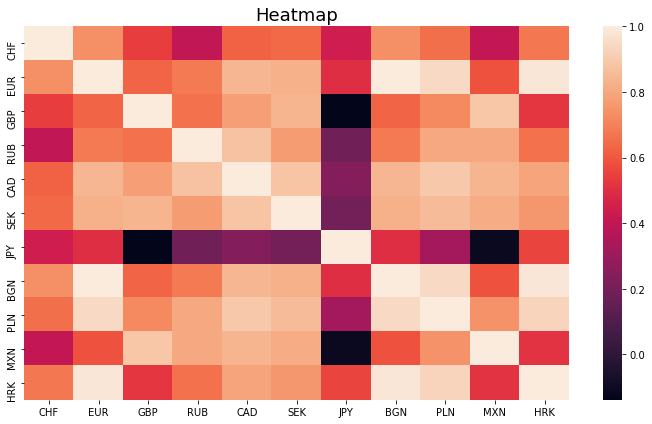

In [15]:
import seaborn as sns

fig = plt.figure(figsize = (10,6)) 

ax = sns.heatmap(corr)

plt.title('Heatmap', fontsize = 18)

# tight layout to cut white frames
plt.tight_layout()

# to save the figure uncomment the line below
# fig.savefig('heatmap.pdf', format='pdf')

Interesting obervartions: only GBP and JPY have negative correlation. Strictly speaking, it approaches to zero from the left.

Let us now be focused on the following currencies: CHF, EUR, RUB, and GBP.

`Seaborn` allows one to combine several types of plots in one figure. For example, we can show the scatter plot for chosen currencies together with the histogram (or probability density function).

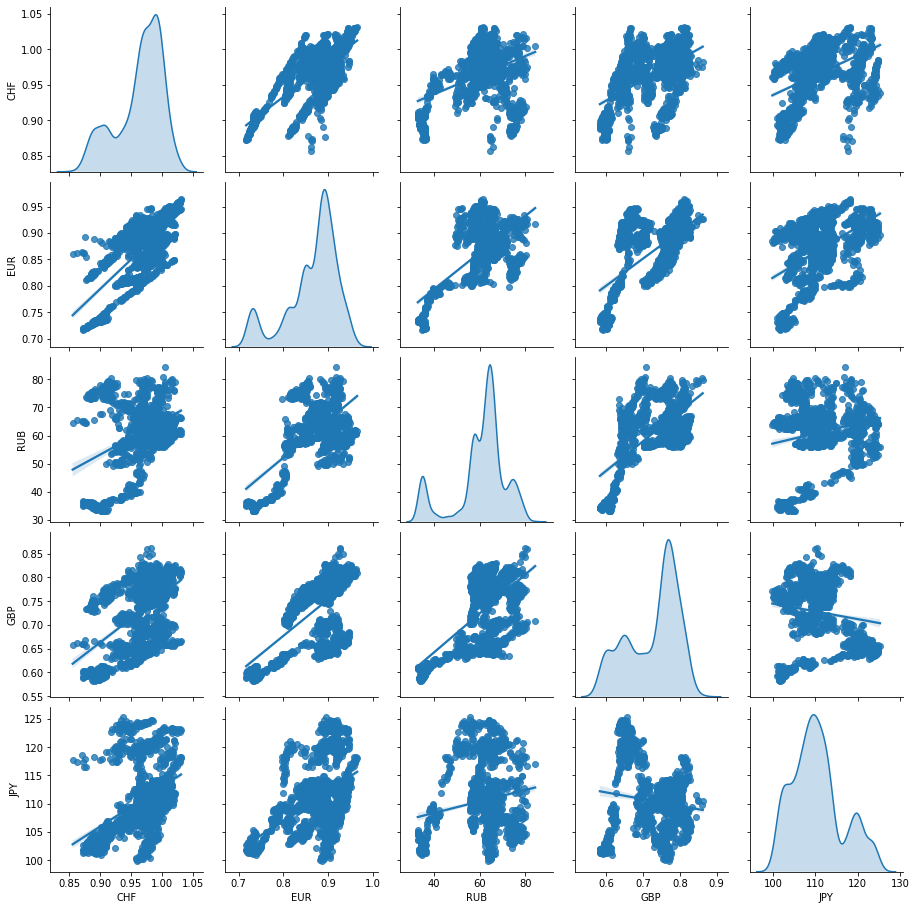

In [16]:
# we can select only 'CHF','EUR','RUB','GBP','JPY' rows
# from the whole data frame
data = df.loc[:, ['CHF','EUR','RUB','GBP','JPY']]

# we choose kde (kernel density estimation, or probability density function) to be shown on diagonal
g = sns.pairplot(data, diag_kind="kde", kind="reg")

# to save the figure uncomment the line below
# g.savefig('pairplot.pdf', format='pdf')

We included JPY here because of its correlation with GBP. It is clearly seen that the correlation is almost absent (horizontal line).

Another usefull tool from the `Seaborn` package is `PairGrid`, that allows one to choose explicitly what to show in the upper/lower triangle and the diagonal.

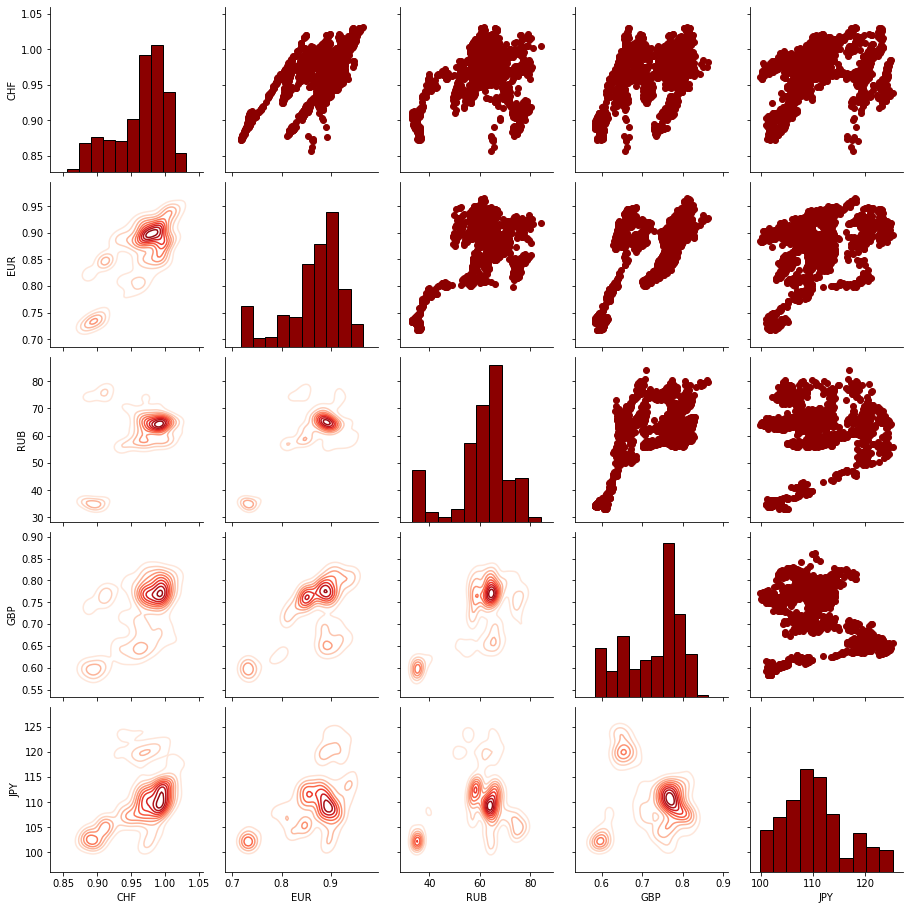

In [17]:
# create an instance of the PairGrid class.
grid = sns.PairGrid(df,                                     # another way is to use the full dataset,
                    vars = ['CHF','EUR','RUB','GBP','JPY'], # but choose only certain variables via 
                                                            # parameter 'vars'                                        
                   )
# map a scatter plot to the upper triangle
grid = grid.map_upper(plt.scatter, color = 'darkred')

# map a histogram to the diagonal
grid = grid.map_diag(plt.hist, bins = 10, color = 'darkred', 
                     edgecolor = 'k')
# map a density plot to the lower triangle
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')

# to save the figure uncomment the line below
# grid.savefig('gridplot.pdf', format='pdf')

Now, let us have a look at the time series plots for chosen currencies: CHF, EUR, RUB, and GBP.

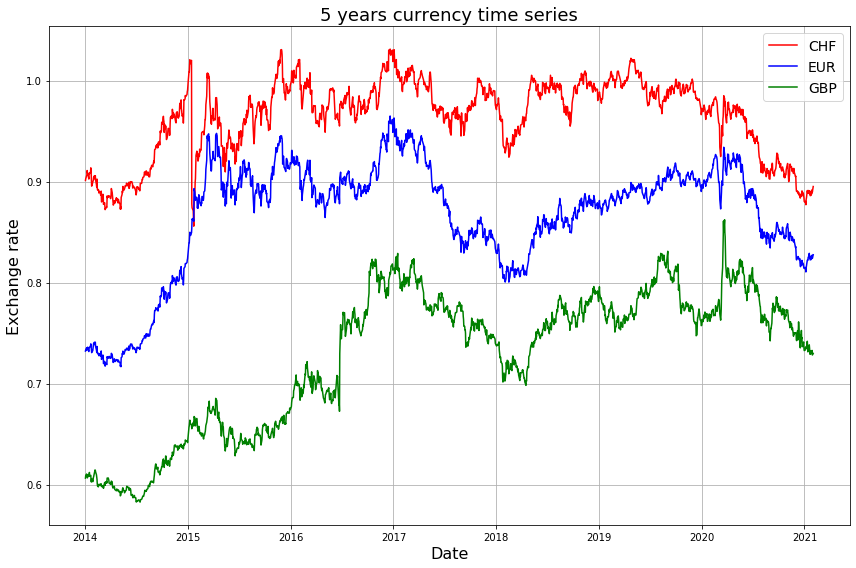

In [18]:
fig, ax = plt.subplots(figsize = (12,8))

# add the x-axis and the y-axis to the plot
ax.plot(df.index.values, 
        df['CHF'], 
        color = 'red', label = 'CHF')
ax.plot(df.index.values, 
        df['EUR'], 
        color = 'blue', label = 'EUR')
ax.plot(df.index.values, 
        df['GBP'], 
        color = 'green', label = 'GBP')

# legend, title, and labels
plt.legend(loc=0, fontsize = 14)
plt.title('5 years currency time series', fontsize = 18)
plt.ylabel("Exchange rate",fontsize = 16)
plt.xlabel('Date',fontsize = 16)

# tight layout to cut white frames
plt.tight_layout()

ax.grid(True)

# to save the figure uncomment the line below
# fig.savefig('CHF-EUR-GBP_rates.pdf', format='pdf')

We plot RUB separately since it has another range of values compare to CHF, EUR, and GBP.

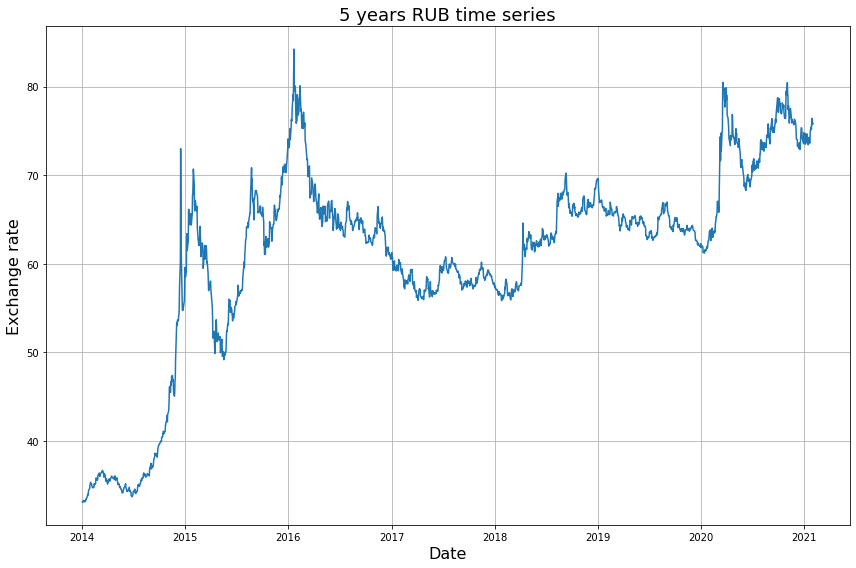

In [19]:
fig, ax = plt.subplots(figsize = (12,8))

plt.plot(df.index.values, df['RUB'])

plt.title('5 years RUB time series', fontsize = 18)
plt.ylabel("Exchange rate",fontsize = 16)
plt.xlabel('Date',fontsize = 16)

# tight layout to cut white frames
plt.tight_layout()

ax.grid(True)

# to save the figure uncomment the line below
# fig.savefig('RUB_rates.pdf', format='pdf')

# Part 2: Analysis Based on the Efficient-Market Hypothesis

## 2.1. Obtaining parameters of currencies

According to the efficient-market hypothesis, the increment $\delta S (t)$ of an asset $S$ equals
\begin{equation}
    \delta S(t) = \mu S(t) \delta t + \sigma(t) S(t) \sqrt{\delta t} X ,
\end{equation}
where $X$ is the standard normal random variable ($\langle X \rangle = 0$ and $\langle X^2 \rangle = 1$) .

If one has a data for past values of an asset $S$, the usual estimation for its mean $\mu$ and volatility $\sigma^2$ is
\begin{equation}
    \mu = \frac{1}{n \delta t} \sum\limits_{i=1}^{n} \frac{S_i-S_{i-1}}{S_{i-1}}
\end{equation}
and
\begin{equation}
    \sigma^2 = \frac{1}{n \delta t} \sum\limits_{i=1}^{n} \left( \frac{S_i-S_{i-1}}{S_{i-1}} - \mu \right)^2.
\end{equation}

Here $n \gg 1$, and $\delta t$ usually is a fraction of a year ($\delta t = 1/365$). 

Below we implemented these procedures for a case of arbitrary assets. The methods take as inputs data and a list of the names of currencies, and return dictionaries of mean income and volatity correspondingly.

In [20]:
import numpy as np

def get_mean_income ( data, currencies ):
    try:
        # parse the string to get a list of currencies' names
        listOfCurrencies = currencies.split(',')
        # number of elements
        n = len(data) - 1
        # step, which is one day
        delta_t = 1/365

        # empty list to store mean values
        means = []
        
        # compute the mean annual income
        for currency in listOfCurrencies:
            mu = 0
            for i in range(1,len(data)):
                mu += ( data[currency][i] - data[currency][i-1] )/data[currency][i-1] 
            mu /= (n*delta_t)
            means.append(mu)
        
        # write mean values together with corresponding currencies to a dictionary
        d = {}
        for i in range(len(listOfCurrencies)):
            d.update( {listOfCurrencies[i] : means[i]}  )
            
        # return a dictionary of mean values
        return d
    
    # if there is no currency in database
    except KeyError as e:
        print("Database has no such a currency:",e)
        return 0


def get_volatility ( data, currencies, means ):
    try:
        # parse the string to get a list of currencies' names
        listOfCurrencies = currencies.split(',')
        # number of elements
        n = len(data) - 1    
        # step, which is one day
        delta_t = 1/365

        # empty list to store valatilities
        vols = []
    
        for currency in listOfCurrencies:
            s = 0
            for i in range(1,len(data)):
                s += ( ( data[currency][i] - data[currency][i-1] )/data[currency][i-1] - means[currency]/365 )**2
            s /= (n*delta_t)
            vols.append( np.sqrt(s) )
        
        # write volatilities together with corresponding currencies to a dictionary
        d = {}
        for i in range(len(listOfCurrencies)):
            d.update( {listOfCurrencies[i] : vols[i]}  )

        # return a dictionary of volatilities
        return d
    
    # if there is no currency in database
    except KeyError as e:
        print("Database has no such a currency:",e)
        return 0

Let us calculate $\mu$ and $\sigma$ for given currencies.

In [21]:
currencies = "CHF,EUR,GBP,RUB"

means = get_mean_income(df,currencies) 
vols  = get_volatility(df,currencies,means)

Extract $\mu$ and $\sigma$ for each currency.

In [22]:
listOfCurrencies = currencies.split(',')

for currency in listOfCurrencies:
    print("mean annual income of %s is %s%% with volatility %s%%" % (currency, round( means[currency]*100, 2), round(vols[currency]*100,2) ))

mean annual income of CHF is 0.51% with volatility 11.15%
mean annual income of EUR is 2.92% with volatility 9.48%
mean annual income of GBP is 4.39% with volatility 11.41%
mean annual income of RUB is 19.31% with volatility 23.01%


RUB gives the highest annual income and, at the time, has the highest volatility. This is somewhat expected: volatility, as a rule of a thumb, is expected to be proportional to income.

An interesting result is that CHF has high volatility (11.15%), while giving the lowest annual income (0.51%).

## 2.2. Portfolio optimisation

Assume we have a certain ammount of money, and assume we want to invest in a portfolio of currencies in order to obtain some passive annual income. Also let us assume, that we wan such a portfolio to give us the annual income $\mu_{\Pi}$.

For example, it could be an average income of the chosen currencies:

In [23]:
# extract a list of mean income
m = [means[currency] for currency in listOfCurrencies]
# and convert it to an array
m = np.asarray(m)
# get the average
m = np.mean(m)
m

0.06781427373491762

The income of 6.78% is bigger than income from investing to CHF, EUR, or GBP separately.

It is clear, that there should be the following conditions:

\begin{equation}
    \left\{
    \begin{aligned}
    \sum_i^m x_i &= 1,
    \\
    \sum_i^m x_i \mu_i &= \mu_{\Pi},
    \end{aligned}
    \right.
\end{equation}
where $x_i$ is a fraction of money invested into asset with annual income $\mu_i$, $m$ is the number of assets in portfolio.

Additionaly, we shall require for such a portfolio to have a _minimal_ volatility. In other words, we should minimise the portfolio's volatility function
\begin{equation}
    \sigma^2_{\Pi} = \sum_i^m x_i^2 \sigma_i^2
\end{equation}

subject to the system of constraints above.

This problem can be solve usig the method of **Lagrange's undetermined multipliers**. According to this method, we consider the function
\begin{equation}
    f (\mathbf x) = \sum_i^m x_i^2 \sigma_i^2 - \alpha \sum_i^m x_i \mu_i - \beta \sum_i^m x_i,
\end{equation}
where $\alpha$ and $\beta$ are the Lagrange's multipliers. The equation for determination the extremum has the form
\begin{equation}
    \frac{\partial f}{\partial x_i} = 0, \quad (i=1,\ldots,m).
\end{equation}

The solution to this equation in general form is
\begin{equation}
    x_i = \beta C_i^{(0)} + \alpha C_i^{(1)}, \quad (i=1,\ldots,m).
\end{equation}

The system of constraints now has the form
\begin{equation}
    \left\{
    \begin{aligned}
    \beta \tilde C_0 + \alpha \tilde C_1 &= 1,
    \\
    \beta \tilde C_1 + \alpha \tilde C_2 &= \mu_{\Pi},
    \end{aligned}
    \right.
\end{equation}
where
\begin{equation}
    \tilde C_0 = \sum_i^m C_i^{(0)} = \frac12 \sum_i^m \frac{1}{\sigma^2_i},
    \quad 
    \tilde C_1 = \sum_i^m C_i^{(1)} = \frac12 \sum_i^m \frac{\mu_i}{\sigma^2_i},
    \quad
    \tilde C_2 = \sum_i^m C_i^{(0)} = \frac12 \sum_i^m \frac{\mu_i^2}{\sigma^2_i}.
\end{equation}

From the first equation of the system, we have
\begin{equation}
    \beta = \frac{1 - \alpha \tilde C_1}{\tilde C_0}.
\end{equation}
Substituting this into the second equation yields
\begin{equation}
    \alpha = \left( \mu_{\Pi} - \frac{\tilde C_1}{\tilde C_0} \right) \cdot \frac{1}{\tilde C_2 - \tilde C_1^2/\tilde C_0}.
\end{equation}

This gives the solution to the problem optimisation problem.

Below, we implement the solution to this optimisation problen for a case of arbitrary number of currencies in the portfolio. The method `get_portfolio` computes the Lagrange's multipliers and then determines the fractions $x_i$ required to minimise the portfolio's volatility.

The method `get_vol_of_portfolio` returns $\sigma_{\Pi}$.

In [24]:
def get_portfolio(means_dict, vols_dict, currencies, income):
    try:
        listOfCurrencies = currencies.split(',')
        
        # extract a list of mean income
        means = [means_dict[currency] for currency in listOfCurrencies]
        # and convert it to an array
        means = np.asarray(means)
        
        # the same for volatilities
        vols = [vols_dict[currency] for currency in listOfCurrencies]
        vols = np.asarray(vols)
        
        # raise to a square each element
        vols = np.square(vols)
        # get the reciprocal of each element
        vols = np.reciprocal(vols.astype(np.float32))
        
        # an array for the coefficients \tilde C_i
        coef = 0.5 * np.array([ np.sum(vols), np.dot(means,vols), np.dot( np.square(means),vols) ])
        
        # the Lagrange multipliers
        alpha = ( income - coef[1]/coef[0] ) / ( coef[2] - coef[1]**2/coef[0] )
        beta  = ( 1 - alpha*coef[1] )/coef[0]
        
        # the array of the desired currency fractions listed in the same order as in input list 'currencies'
        fractions = 0.5*(beta*vols + alpha*means*vols)
        
        return fractions
    
    # if there is no currency in database
    except KeyError as e:
        print("Dictionaries have no such a currency:",e)
        return 0
    
    except TypeError as e:
        print("Check the number of input currencies.")
        return 0

def get_vol_of_portfolio(fractions, vols_dict, currencies):
    listOfCurrencies = currencies.split(',')
    
    vols = [vols_dict[currency] for currency in listOfCurrencies]
    vols = np.asarray(vols)
        
    # raise to square each element
    vols      = np.square(vols)
    fractions = np.square(fractions)
    
    return np.sqrt( np.dot( vols,fractions ) )

We have already determined the values of $\mu_i$ and $\sigma_i$. Thus, the fracions $x_i$ are

In [25]:
x = get_portfolio(means,vols,currencies,m) # m is the desired portfolio's income (calculated above)
x

array([0.13669846, 0.33814699, 0.29592393, 0.22923062])

We can check that the condition $\sum_i x_i = 1$ holds:

In [26]:
np.sum(x)

1.000000001790304

The volatility of this portfolio is

In [27]:
get_vol_of_portfolio(x,vols,currencies)

0.07198728983406202

which is 7.2%

## 2.3. Discussion and Conclusions

To summarise, we have built the portfolio consist of 4 currencies (CHF, EUR, GBP, RUB). This porfolio brings $\mu_{\Pi} = 6.78$% income (which is higher than CHF, EUR, or GBP) and has the volatility $\sigma_{\Pi} = 7.2$%, which is *the lowest* than that of all four currencies.

Let us illustrate the fractions of the proposed portfolio on a pie-chart.

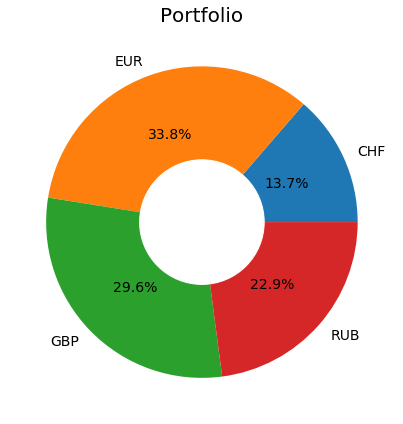

In [28]:
# create data
fractions = x.tolist()
listOfCurrencies = currencies.split(',')

# create figure
fig = plt.figure(figsize = (6,6))
 
# create a circle for the center of the plot
my_circle = plt.Circle( (0,0), 0.4, color='white')

# labels, title, legend
plt.pie(fractions, labels = listOfCurrencies, autopct="%.1f%%", textprops={'fontsize': 14})
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Portfolio", fontsize = 20)

# tight layout to cut white frames
plt.tight_layout()

# to save the figure uncomment the line below
# fig.savefig('portfolio_donut.pdf', format='pdf')

Proposed method allows easily to switch between currencies. For example, if we choose another set of currecnies, the code will be:

In [29]:
# new set of currencies
currencies = "EUR,JPY,PLN"

# mean income and volatilities for chosen currensies
means = get_mean_income(df,currencies) 
vols  = get_volatility(df,currencies,means)

# choose the desired income as an average of EUR, JPY and PLN
m = 0
for key in means:
    m += means[key]
m /= 3
print("For the desired income %s%%, the split is" % round(m*100,2))

# fractions
x = get_portfolio(means,vols,currencies,m)
x

For the desired income 2.68%, the split is


array([0.39764605, 0.30645394, 0.29589992])

Check the condition

In [30]:
np.sum(x)

0.9999999123511276

The volatility of this portfolio is

In [31]:
get_vol_of_portfolio(x,vols,currencies)

0.059392136326062994

We see that such a portfolio is _less_ profitable than that consist of CHF, EUR, GBP, and RUB. It has lower income (2.68%), however, it also has lower volatility (5.9%).

-EoF-